In [1]:
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import seaborn as sns


In [2]:
# Load the dataset from the CSV file
dataset = load_dataset('csv', data_files=r'C:\Users\lahms\OneDrive\Documents\Sam - Data Analyst\data_jobs.csv')

# Convert the dataset to a pandas DataFrame
df = dataset['train'].to_pandas()

# Data Cleaning: Convert the 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# Show the first few rows of the DataFrame to check the results


In [3]:
filtered_data = df_Spain[df_Spain['job_title_short'] == 'Senior Engineer']

# Display the result
filtered_data

NameError: name 'df_Spain' is not defined

In [3]:
df_Spain = df[(df['job_country'] == 'Spain')].dropna(subset=['salary_year_avg'])


In [6]:
job_titles = df_Spain ['job_title_short'].value_counts().index[:10].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Analyst',
 'Software Engineer',
 'Senior Data Scientist',
 'Business Analyst',
 'Cloud Engineer']

In [7]:
df_Spain_top10 = df_Spain[df_Spain['job_title_short'].isin(job_titles)]

In [23]:
job_order = df_Spain_top10.groupby ('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

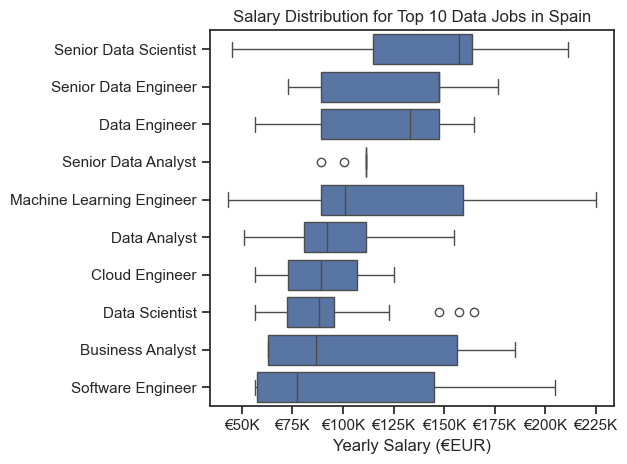

In [ ]:
# Create the boxplot with the specified order
ax = sns.boxplot(data=df_Spain_top10.dropna(subset=['job_title_short']), x='salary_year_avg', y='job_title_short', order=job_order)

# Apply a consistent theme
sns.set_theme(style='ticks')

# Set title & labels
plt.title('Salary Distribution for Top 10 Data Jobs in Spain')
plt.xlabel('Yearly Salary (€EUR)')
plt.ylabel('')  # Leave the y-label empty as intended

# Custom x-axis formatter for salary in €K
ticks_x = plt.FuncFormatter(lambda y, pos: f'€{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()


In [61]:
df_Spain_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()
df_Spain_DA = df_Spain_DA.dropna (subset=['salary_year_avg'])

In [62]:
df_Spain_DA = df_Spain_DA.explode ('job_skills')
df_Spain_DA [['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
17710,51014.0,None
32177,111175.0,sql
32177,111175.0,python
32177,111175.0,r
32177,111175.0,databricks


In [76]:
df_Spain_DA.groupby ('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values (by = 'median', ascending = False)

,count,median
job_skills,,
smartsheet,1,155000.0
sap,1,118640.0
npm,1,111202.0
node.js,1,111202.0
react,1,111202.0
angular,1,111202.0
scikit-learn,1,111175.0
looker,4,111175.0
numpy,2,111175.0


In [78]:
df_Spain_top_pay = df_Spain_DA.groupby ('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values (by = 'median', ascending = False)
df_Spain_top_pay = df_Spain_top_pay.head(10)
df_Spain_top_pay

,count,median
job_skills,,
smartsheet,1,155000.0
sap,1,118640.0
npm,1,111202.0
node.js,1,111202.0
react,1,111202.0
angular,1,111202.0
scikit-learn,1,111175.0
looker,4,111175.0
numpy,2,111175.0


In [80]:
df_Spain_DA_skills = df_Spain_DA.groupby ('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_Spain_DA_skills = df_Spain_DA_skills.head(10).sort_values(by= 'median', ascending = False)
df_Spain_DA_skills

,count,median
job_skills,,
looker,4,111175.0
pandas,4,108087.5
jupyter,3,105000.0
python,14,98500.0
tableau,9,98500.0
airflow,3,98500.0
sql,17,89100.0
snowflake,3,89100.0
power bi,4,73352.0


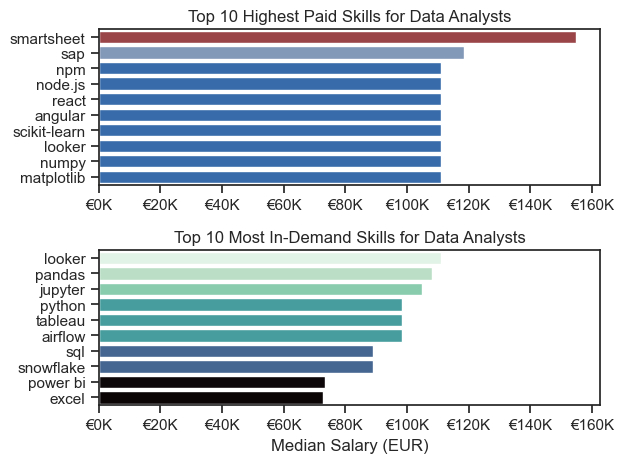

In [112]:
fig, ax = plt.subplots (2, 1)
sns.set_theme(style="ticks")
sns.barplot(data = df_Spain_top_pay, x = 'median', y = df_Spain_top_pay.index, ax = ax [0], hue = 'median', palette="vlag")
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot (kind = 'barh', y = 'median', ax = ax [0], legend = False)
ax[0].set_title ('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x / 1000)}K'))

sns.barplot(data = df_Spain_DA_skills, x = 'median', y = df_Spain_DA_skills.index, ax = ax [1], hue = 'median', palette = 'mako')
ax[1].legend().remove()
#df_Spain_DA_skills[::-1].plot (kind = 'barh', y = 'median', ax = ax [1], legend = False)
ax[1].set_title ('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel ('')
ax[1].set_xlabel ('Median Salary (EUR)')
ax[1].set_xlim (ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x / 1000)}K'))

fig.tight_layout()